In [36]:
import csv
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
track_df = pd.read_csv('track_dataframe.csv')

In [48]:
track_df.head()

,track_name,track_artist_name,track_album_type,track_album_name,track_album_release_date,track_duration_ms,track_explicit,track_popularity,track_danceability,track_energy,track_key,track_loudness,track_mode,track_speechiness,track_acousticness,track_instrumentalness,track_liveness,track_valence,track_tempo
0,夜に駆ける,YOASOBI,SINGLE,夜に駆ける,2019-12-15,261013,False,77,0.670,0.874,8,-5.221,1,0.0305,0.00231,0.000017,0.3000,0.789,130.041
1,Snowman,Sia,ALBUM,Everyday Is Christmas (Deluxe Edition),2018-11-01,165900,False,77,0.716,0.512,1,-6.257,1,0.0331,0.48300,0.000000,0.0928,0.326,104.957
2,WARMISITAY,Milena Warthon,SINGLE,WARMISITAY,2022-05-06,204219,False,50,0.496,0.706,1,-5.806,1,0.6660,0.64300,0.000000,0.3320,0.765,188.026
3,Butterfly (Digimon),Inheres,ALBUM,"Anime Covers, Vol. 1",2020-12-20,96229,False,31,0.460,0.844,9,-8.125,1,0.0542,0.01230,0.000521,0.0306,0.577,165.051
4,Cupid - Twin Ver.,FIFTY FIFTY,SINGLE,The Beginning: Cupid,2023-02-24,174253,False,98,0.783,0.592,11,-8.332,0,0.0331,0.43500,0.000004,0.3470,0.726,120.018


In [49]:
track_df.dtypes

track_name                   object
track_artist_name            object
track_album_type             object
track_album_name             object
track_album_release_date     object
track_duration_ms             int64
track_explicit                 bool
track_popularity              int64
track_danceability          float64
track_energy                float64
track_key                     int64
track_loudness              float64
track_mode                    int64
track_speechiness           float64
track_acousticness          float64
track_instrumentalness      float64
track_liveness              float64
track_valence               float64
track_tempo                 float64
dtype: object

### Convert booleans and datetimes

In [69]:
track_df['track_album_release_date'] = pd.to_datetime(track_df['track_album_release_date'])#, format='mixed')
track_df['track_album_release_date'] = track_df['track_album_release_date'].astype(int) / 10**9
track_df['track_explicit'] = track_df['track_explicit'].replace({True: 1, False: 0})

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [70]:
track_df.head()

,track_name,track_artist_name,track_album_type,track_album_name,track_album_release_date,track_duration_ms,track_explicit,track_popularity,track_danceability,track_energy,track_key,track_loudness,track_mode,track_speechiness,track_acousticness,track_instrumentalness,track_liveness,track_valence,track_tempo
0,夜に駆ける,YOASOBI,SINGLE,夜に駆ける,1.576368,261013,0,77,0.670,0.874,8,-5.221,1,0.0305,0.00231,0.000017,0.3000,0.789,130.041
1,Snowman,Sia,ALBUM,Everyday Is Christmas (Deluxe Edition),1.541030,165900,0,77,0.716,0.512,1,-6.257,1,0.0331,0.48300,0.000000,0.0928,0.326,104.957
2,WARMISITAY,Milena Warthon,SINGLE,WARMISITAY,1.651795,204219,0,50,0.496,0.706,1,-5.806,1,0.6660,0.64300,0.000000,0.3320,0.765,188.026
3,Butterfly (Digimon),Inheres,ALBUM,"Anime Covers, Vol. 1",1.608422,96229,0,31,0.460,0.844,9,-8.125,1,0.0542,0.01230,0.000521,0.0306,0.577,165.051
4,Cupid - Twin Ver.,FIFTY FIFTY,SINGLE,The Beginning: Cupid,1.677197,174253,0,98,0.783,0.592,11,-8.332,0,0.0331,0.43500,0.000004,0.3470,0.726,120.018


### Clustering visualization

In [76]:
clustering_data = track_df[['track_album_release_date', 'track_duration_ms','track_explicit','track_popularity','track_danceability', 'track_energy','track_key','track_loudness','track_mode','track_speechiness','track_acousticness','track_instrumentalness','track_liveness','track_valence','track_tempo']]

In [77]:
clustering_data.head()

,track_album_release_date,track_duration_ms,track_explicit,track_popularity,track_danceability,track_energy,track_key,track_loudness,track_mode,track_speechiness,track_acousticness,track_instrumentalness,track_liveness,track_valence,track_tempo
0,1.576368,261013,0,77,0.670,0.874,8,-5.221,1,0.0305,0.00231,0.000017,0.3000,0.789,130.041
1,1.541030,165900,0,77,0.716,0.512,1,-6.257,1,0.0331,0.48300,0.000000,0.0928,0.326,104.957
2,1.651795,204219,0,50,0.496,0.706,1,-5.806,1,0.6660,0.64300,0.000000,0.3320,0.765,188.026
3,1.608422,96229,0,31,0.460,0.844,9,-8.125,1,0.0542,0.01230,0.000521,0.0306,0.577,165.051
4,1.677197,174253,0,98,0.783,0.592,11,-8.332,0,0.0331,0.43500,0.000004,0.3470,0.726,120.018


In [80]:
# Dimensionality reduction
from sklearn.manifold import TSNE
reduced_cluster_data = TSNE(n_components=2, learning_rate='auto',init='pca', perplexity=30).fit_transform(clustering_data)
reduced_cluster_data = pd.DataFrame(reduced_cluster_data, columns=['x','y'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [81]:
reduced_cluster_data

,x,y
0,56569.773438,0.916354
1,-38774.097656,-19.978924
2,-1148.657104,653.220154
3,-108457.789062,51.764824
4,-29838.587891,-9.649365
5,-84851.328125,830.490967
6,5762.937500,-9.770545
7,-44086.097656,-33.963352
8,-50173.515625,-34.284325
9,-10482.874023,-253.048340


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 22812 (\N{CJK UNIFIED IDEOGRAPH-591C}) missing from current font.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from current font.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 39366 (\N{CJK UNIFIED IDEOGRAPH-99C6}) missing from current font.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 12369 (\N{HIRAGANA LETTER KE}) missing from current font.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from current font.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/i

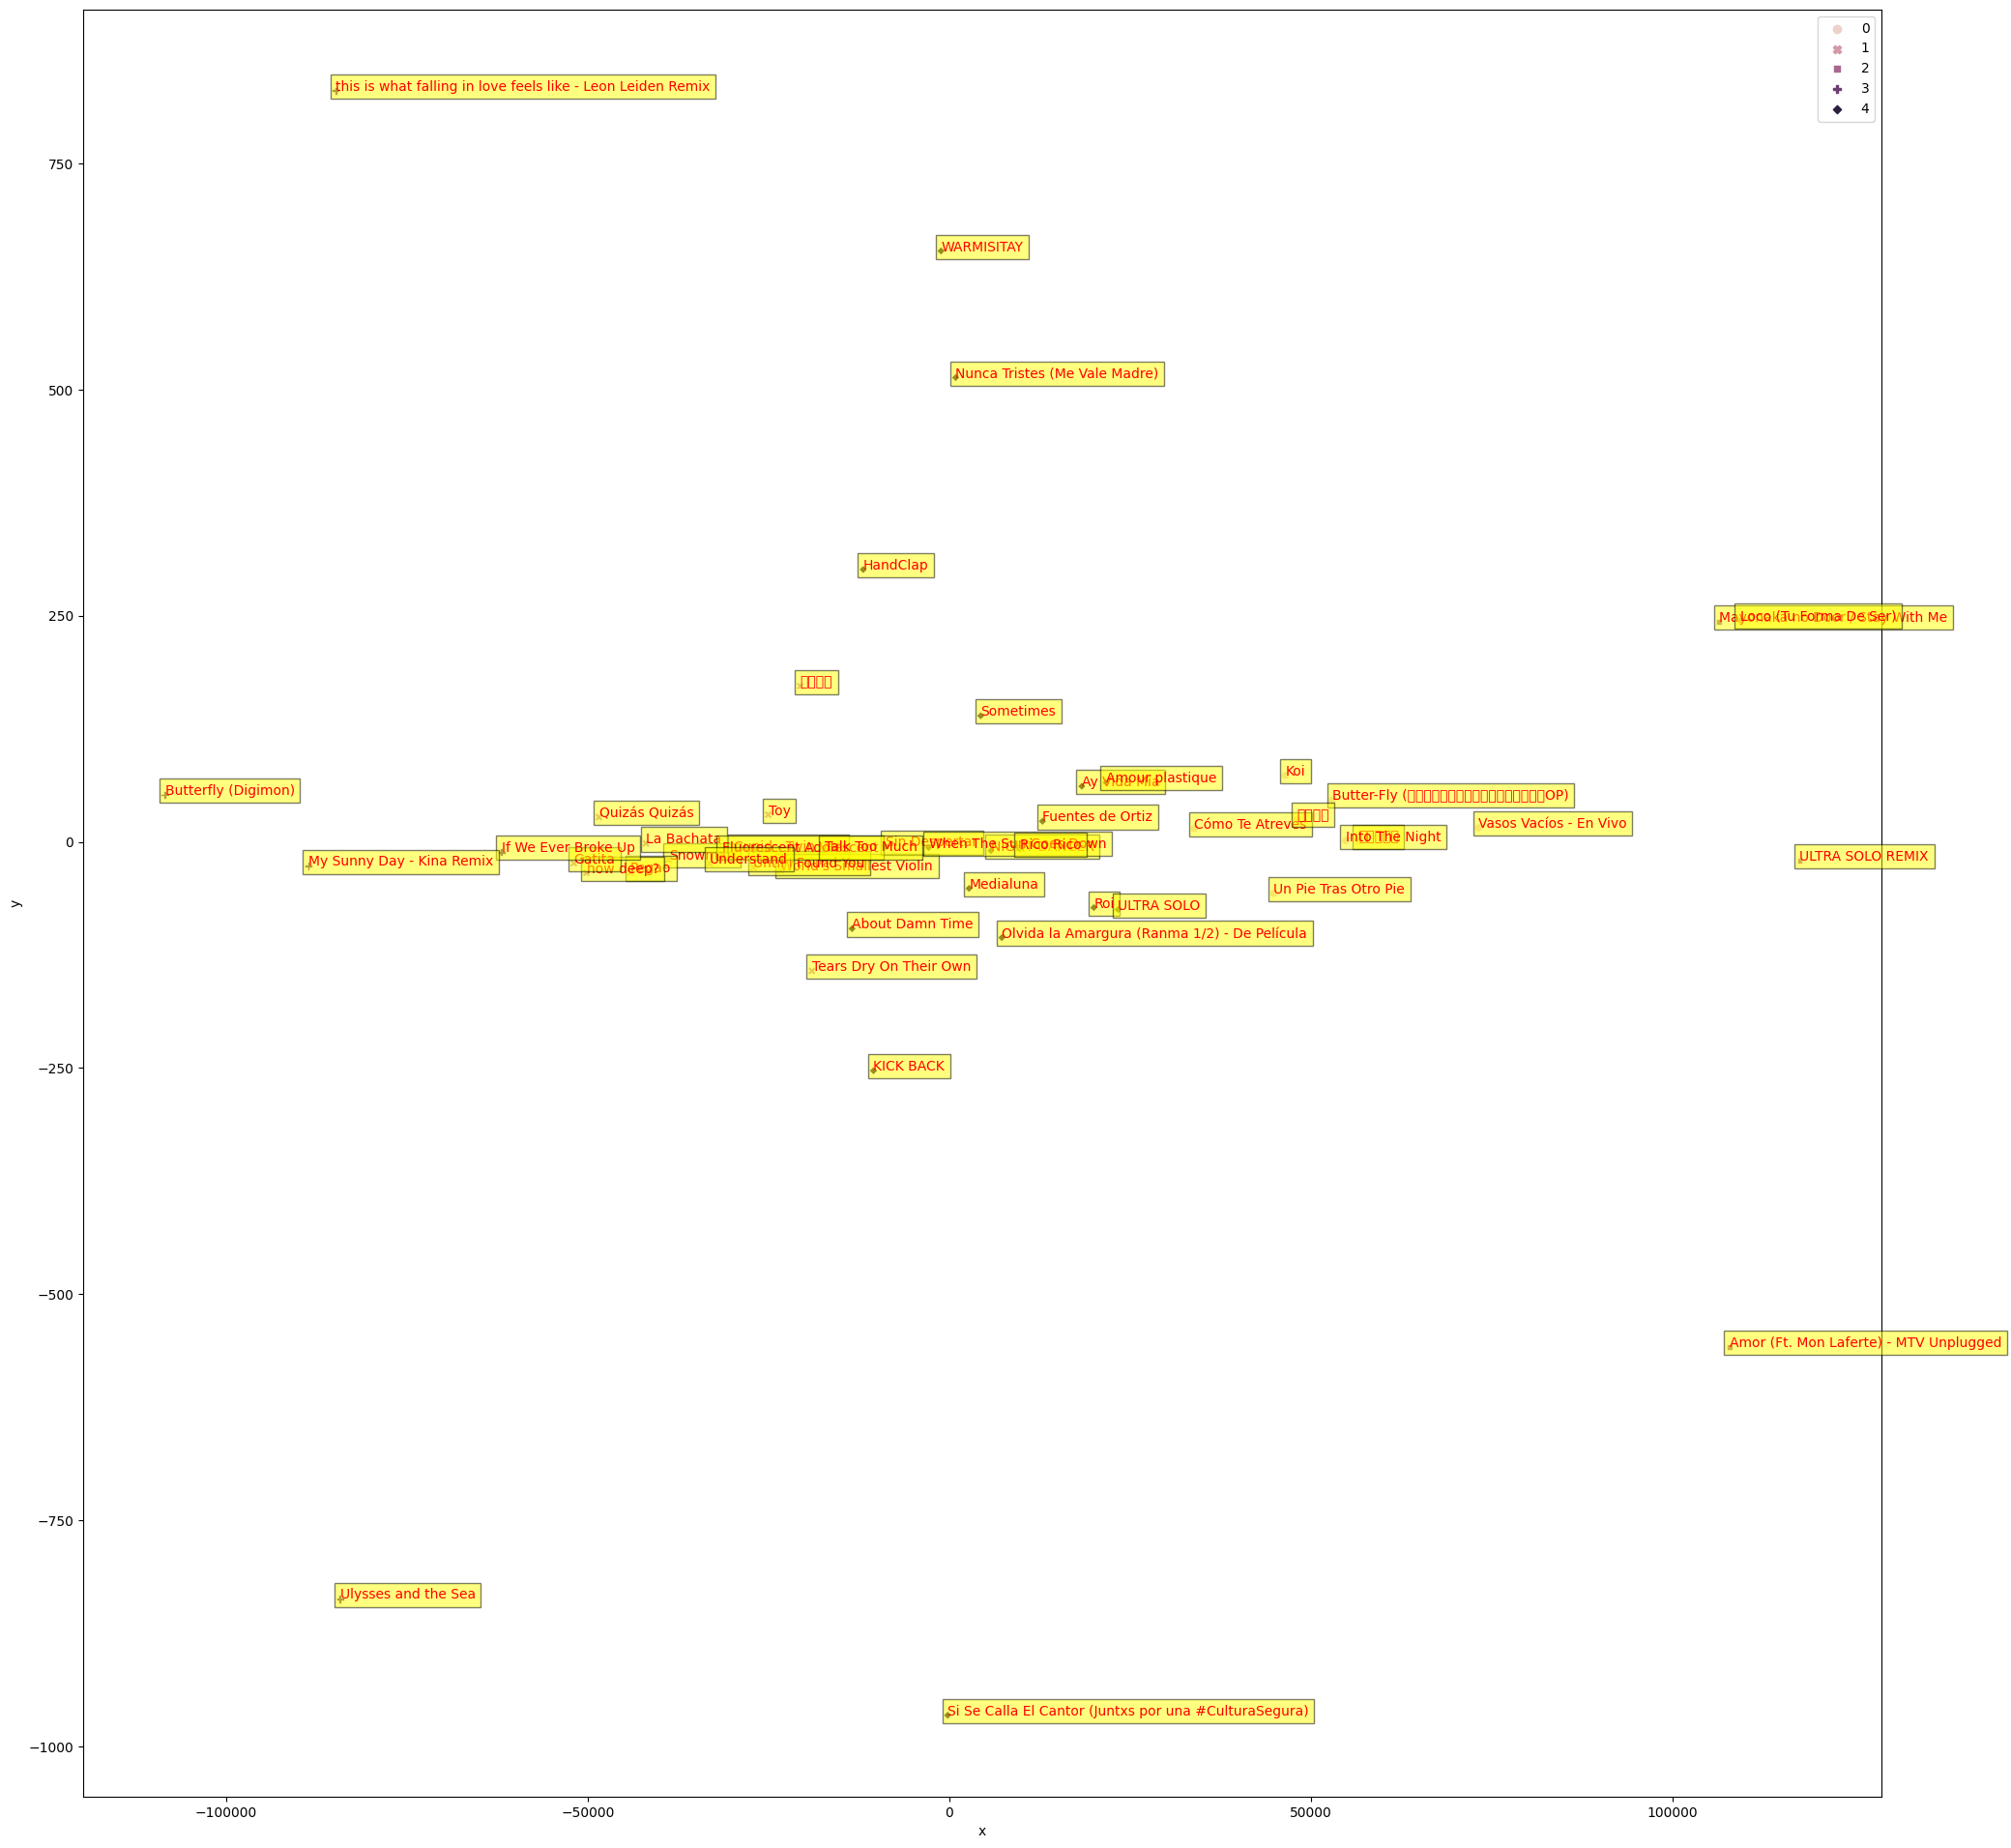

In [101]:

common_params = {
    "n_init": 20,
    "random_state": 170,
}

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(24, 24))


y_pred = KMeans(n_clusters=5, **common_params).fit_predict(reduced_cluster_data)
#axs.scatter(reduced_cluster_data['x'], reduced_cluster_data['y'], c=y_pred)
#axs.set_title("Non-optimal Number of Clusters")
sns.scatterplot(data=reduced_cluster_data, x="x", y="y", hue=y_pred, style=y_pred)


#sns.scatterplot(data=df,x=’G’,y=’GA’)

for i in range(track_df.shape[0]):
    plt.text(x=reduced_cluster_data.x[i]+0.3,y=reduced_cluster_data.y[i]+0.3, s=track_df.track_name[i],\
             fontdict=dict(color='red',size=10), bbox=dict(facecolor='yellow',alpha=0.5))
plt.savefig('test_fig.png')

In [92]:
track_df.track_name[3]

'Butterfly (Digimon)'